In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
flag = False
elements_ = []

with open('d_big.in') as input_:
    for line in input_:
        if flag is False:
            rows, cols, min_ingredients, max_cells = line.split(' ')
            flag = True
        else:
            elements_.append(np.array(list(line.rstrip())))

In [3]:
df = pd.DataFrame(elements_)
pizza_ = df.replace(['M', 'T'], [1, 0])

total_tomatoes = len(pizza_[pizza_.values == 0])
total_mushrooms = len(pizza_[pizza_.values == 1])
less_ingredient = 'tomatoes' if total_tomatoes < total_mushrooms else 'mushrooms'

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

sns.heatmap(pizza_)
plt.show()

<Figure size 640x480 with 2 Axes>

#### SETAS => 1

#### TOMATES => 0

In [5]:
def maximize_cuts(max_):
    possible_cuts = list()
    
    for j in range(max_, (int(min_ingredients) * 2) - 1, -1):
        for i in range(j, 0, -1):
            x_ = j % i
            y_ = j % i

            if x_ == 0 and y_ == 0:
                item_x = [int(j / i), i]
                item_y = [i, int(j / i)]
                if item_x not in possible_cuts:
                    possible_cuts.append(item_x)
                if item_y not in possible_cuts:
                    possible_cuts.append(item_y)
            
    return possible_cuts

In [6]:
class pizzaSlice:
    slice_ = None
    value_ = 0
    
    def __init__(self, slice_):
        self.slice_ = slice_
        self.value_ = self.calc_value()
        
    def calc_value(self):
        mushrooms = 0
        tomatoes = 0
        
        for val in self.slice_:
            if pizza_.at[val[0], val[1]] == 1:
                mushrooms += 1
            elif pizza_.at[val[0], val[1]] == 0:
                tomatoes += 1
                
        if less_ingredient == 'tomatoes':
            return tomatoes
        else:
            return mushrooms

In [7]:
def matches_condition(pizza_, pizza_slices):
    if not pizza_slices:
        return None
    else:
        min_slice = pizza_slices[0]
        max_cells = 0
        
        for pizza_slice in pizza_slices:
            tomatoes = 0
            mushrooms = 0
            for cell_slice in pizza_slice.slice_:
                if pizza_.at[cell_slice[0], cell_slice[1]] == 1:
                    mushrooms += 1
                elif pizza_.at[cell_slice[0], cell_slice[1]] == 0:
                    tomatoes += 1
            if mushrooms >= int(min_ingredients) and tomatoes >= int(min_ingredients):
                if min_slice.value_ > pizza_slice.value_ and max_cells < len(pizza_slice.slice_):
                    max_cells = len(pizza_slice.slice_)
                    min_slice = pizza_slice

        return min_slice.slice_

In [8]:
def check_cuts(x, y, min_, max_, cuts_):
    slices_ = list()
    
    for cut in cuts_:
        slice_ = list()
        invalid = False
        
        for i in range(cut[0]):
            for j in range(cut[1]):
                if x + i < pizza_.shape[0] and y + j < pizza_.shape[1] and pizza_.at[x + i, y + j] != 5:
                    slice_.append([x + i, y + j])
                else:
                    invalid = True
        
        if invalid is False:
            slices_.append(pizzaSlice(slice_))
    
    return slices_

In [9]:
good_slices = list()
possible_cuts = maximize_cuts(int(max_cells))

for row_ in range(pizza_.shape[0]):
    for col_ in range(pizza_.shape[1]):
        if pizza_.at[row_, col_] != 5:
            slices_ = check_cuts(row_, col_, int(min_ingredients), int(max_cells), possible_cuts)
            slice_ = matches_condition(pizza_, slices_)
            if slice_ is not None:
                col_final = len(slice_)
                good_slices.append([row_, slice_[col_final - 1][0], col_, slice_[col_final - 1][1]])
                for element in slice_:
                    pizza_.at[element[0], element[1]] = 5

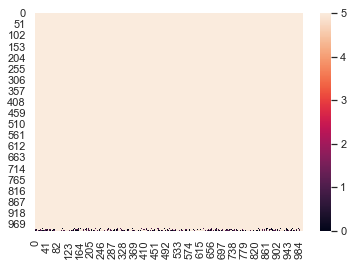

In [10]:
sns.heatmap(pizza_)
plt.show()

In [11]:
with open('heuristic_big.out', 'w') as f_:
    f_.write(str(len(good_slices)) + "\n")
    
    for value_ in good_slices:
        f_.write(str(value_[0]) + " " + str(value_[2]) + " " + str(value_[1]) + " " + str(value_[3]) + "\n")